In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv(r'C:\Users\SUHAIR\Desktop\DSA\mushrooms.csv')

In [5]:
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [7]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
for col in data:
    print(col)
    print(data[col].unique())

class
['p' 'e']
cap-shape
['x' 'b' 's' 'f' 'k' 'c']
cap-surface
['s' 'y' 'f' 'g']
cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises
['t' 'f']
odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment
['f' 'a']
gill-spacing
['c' 'w']
gill-size
['n' 'b']
gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape
['e' 't']
stalk-root
['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring
['s' 'f' 'k' 'y']
stalk-surface-below-ring
['s' 'f' 'y' 'k']
stalk-color-above-ring
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type
['p']
veil-color
['w' 'n' 'o' 'y']
ring-number
['o' 't' 'n']
ring-type
['p' 'e' 'l' 'f' 'n']
spore-print-color
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population
['s' 'n' 'a' 'v' 'y' 'c']
habitat
['u' 'g' 'm' 'd' 'p' 'w' 'l']


It was obsereved that set of data valued as "?" is present in the 'stalk-root' feature. Hence it has to be cleared.

In [10]:
colm = list(data.columns)
for cl in colm:
    for i in range(data.shape[0]):
        if cl == "stalk-root" and data[cl][i] == "?":
            data[cl][i] = None

In [11]:
data.isna().sum()/(len(data))*100

class                        0.000000
cap-shape                    0.000000
cap-surface                  0.000000
cap-color                    0.000000
bruises                      0.000000
odor                         0.000000
gill-attachment              0.000000
gill-spacing                 0.000000
gill-size                    0.000000
gill-color                   0.000000
stalk-shape                  0.000000
stalk-root                  30.526834
stalk-surface-above-ring     0.000000
stalk-surface-below-ring     0.000000
stalk-color-above-ring       0.000000
stalk-color-below-ring       0.000000
veil-type                    0.000000
veil-color                   0.000000
ring-number                  0.000000
ring-type                    0.000000
spore-print-color            0.000000
population                   0.000000
habitat                      0.000000
dtype: float64

Since only 30.53% of the 'stalk-root' data is null, it can't be dropped. Hence asiigning Mode function for the missing values in the next step:

In [12]:
data['stalk-root'].mode()

0    b
dtype: object

In [13]:
data['stalk-root'].fillna("b", inplace=True)

In [14]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Categorization of Dataset based on Poison and Edible Categories:

<AxesSubplot:title={'center':'Mushrooms: Poison/Edible Categorization'}>

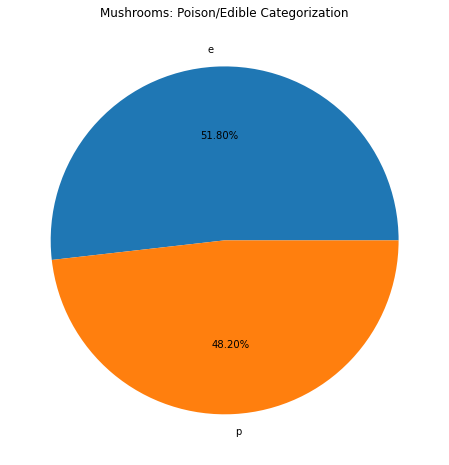

In [15]:
m1=data.groupby(['class']).size()
m1.plot.pie(y='class',figsize=(8, 8),autopct='%1.2f%%',title='Mushrooms: Poison/Edible Categorization',ylabel='')

In [16]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
def check_model_metrices(y_test, y_pred):
    print('Model Accuracy = ', accuracy_score(y_test, y_pred))
    print('Model Precision = ', precision_score(y_test, y_pred, average='micro'))
    print('Model Recall = ', recall_score(y_test, y_pred, average='micro'))
    print('Model F1 Score = ', f1_score(y_test, y_pred, average='micro'))
    print('Confusion Matrix = \n', confusion_matrix(y_test, y_pred))

# Encoding the dataset for ML process:

In [17]:
colmn = list(data.columns)
from sklearn.preprocessing import LabelEncoder
for cl in colmn:
    data[cl] = LabelEncoder().fit_transform(data[cl])

In [18]:
x = data.drop(['class'],axis=1)
y = data['class']
print(f'Feature shape: {x.shape}')

Feature shape: (8124, 22)


In [19]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 8124 non-null   int32
 1   cap-surface               8124 non-null   int32
 2   cap-color                 8124 non-null   int32
 3   bruises                   8124 non-null   int32
 4   odor                      8124 non-null   int32
 5   gill-attachment           8124 non-null   int32
 6   gill-spacing              8124 non-null   int32
 7   gill-size                 8124 non-null   int32
 8   gill-color                8124 non-null   int32
 9   stalk-shape               8124 non-null   int32
 10  stalk-root                8124 non-null   int32
 11  stalk-surface-above-ring  8124 non-null   int32
 12  stalk-surface-below-ring  8124 non-null   int32
 13  stalk-color-above-ring    8124 non-null   int32
 14  stalk-color-below-ring    8124 non-null 

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)

print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 5686 samples.
Testing set has 2438 samples.


In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.fit_transform(x_test)
x_train

array([[ 1.0332865 , -1.47536957, -0.9927541 , ..., -0.66654394,
         1.08575892, -0.8805901 ],
       [-0.21160534,  0.14709467, -0.9927541 , ...,  1.43642401,
         0.27599696,  0.28764026],
       [-0.83405126,  0.95832679, -0.60135209, ..., -0.66654394,
         0.27599696, -0.8805901 ],
       ...,
       [-0.21160534,  0.14709467, -0.20995008, ..., -0.24595035,
        -2.15328894,  0.28764026],
       [-0.83405126,  0.95832679, -0.20995008, ..., -0.66654394,
        -0.53376501, -0.29647492],
       [ 1.0332865 , -1.47536957, -0.9927541 , ..., -0.24595035,
         1.08575892, -0.8805901 ]])

In [22]:
from sklearn.linear_model import LogisticRegression
lnr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
lnr.fit(x_train, y_train)
lnr_pred = lnr.predict(x_test)
check_model_metrices(y_test, lnr_pred)

Model Accuracy =  0.9692370795734209
Model Precision =  0.9692370795734209
Model Recall =  0.9692370795734209
Model F1 Score =  0.9692370795734209
Confusion Matrix = 
 [[1224   31]
 [  44 1139]]


In [23]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
check_model_metrices(y_test, dt_pred)

Model Accuracy =  1.0
Model Precision =  1.0
Model Recall =  1.0
Model F1 Score =  1.0
Confusion Matrix = 
 [[1255    0]
 [   0 1183]]


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
check_model_metrices(y_test, rf_pred)

Model Accuracy =  1.0
Model Precision =  1.0
Model Recall =  1.0
Model F1 Score =  1.0
Confusion Matrix = 
 [[1255    0]
 [   0 1183]]


In [25]:
from sklearn.naive_bayes import GaussianNB
cl = GaussianNB()
cl.fit(x_train, y_train)
y_pred = cl.predict(x_test)
check_model_metrices(y_test, y_pred)

Model Accuracy =  0.881870385561936
Model Precision =  0.881870385561936
Model Recall =  0.881870385561936
Model F1 Score =  0.881870385561936
Confusion Matrix = 
 [[1088  167]
 [ 121 1062]]


In [26]:
from sklearn.naive_bayes import BernoulliNB
bl = BernoulliNB()
bl.fit(x_train, y_train)
y_pred = bl.predict(x_test)
check_model_metrices(y_test, y_pred)

Model Accuracy =  0.8995077932731748
Model Precision =  0.8995077932731748
Model Recall =  0.8995077932731748
Model F1 Score =  0.8995077932731748
Confusion Matrix = 
 [[1230   25]
 [ 220  963]]


# Its noted that Decision Tree and Random Forest model has the max accuracy.

And among the Naive-Bayes approach, the BernouliNB model has better accuracy.